In [6]:
#IMPORTING THE BASIC LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

In [5]:
INPUT_FOLDER='/Users/as186194/Documents/DOCUMENTS/TRIALS/Kaggle/Kaggle_Prima/pima-indians-diabetes-database/'
print ('File Sizes:')
for f in os.listdir(INPUT_FOLDER):
    if 'zip' not in f:
       print (f.ljust(30) + str(round(os.path.getsize(INPUT_FOLDER +  f) / 1000, 2)) + ' KB')

File Sizes:
diabetes.csv                  23.87 KB
Prima_Diabetes.html           1231.61 KB
Prima_Diabetes.ipynb          984.34 KB
Prima_Diabetes.py             2.98 KB


In [7]:
#CREATING A DATAFRAME FOR THE MAIN FILE TO BE USED IN THE CODE
main_file=pd.read_csv(INPUT_FOLDER + 'diabetes.csv')
main_file.shape

(768, 9)

In [8]:
main_file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
main_file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#COUNTING THE PEOPLE WITH AND WITHOUT DIABETES
main_file.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

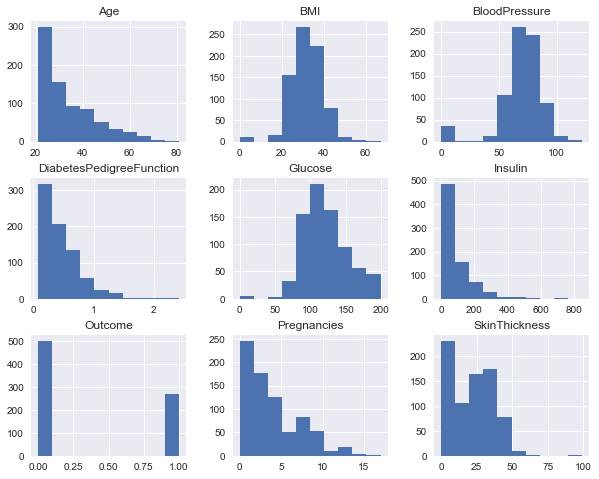

In [11]:
main_file.hist(figsize=(10,8))
plt.figure()
plt.show()

###### Replacing '0' values of the columns mentioned below with their respective column mean.

* BMI
* BLOOD PRESSURE
* GLUCOSE

In [39]:
bmi_mean=main_file["BMI"].mean(skipna= True)
main_file=main_file.replace({'BMI': {0: bmi_mean}}) 

In [44]:
bp_mean=main_file["BloodPressure"].mean(skipna= True)
main_file=main_file.replace({'BloodPressure': {0: bp_mean}}) 

In [51]:
glu_mean=main_file["Glucose"].mean(skipna= True)
main_file=main_file.replace({'Glucose': {0: glu_mean}}) 

In [58]:
main_file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,79.799479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,115.244002,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


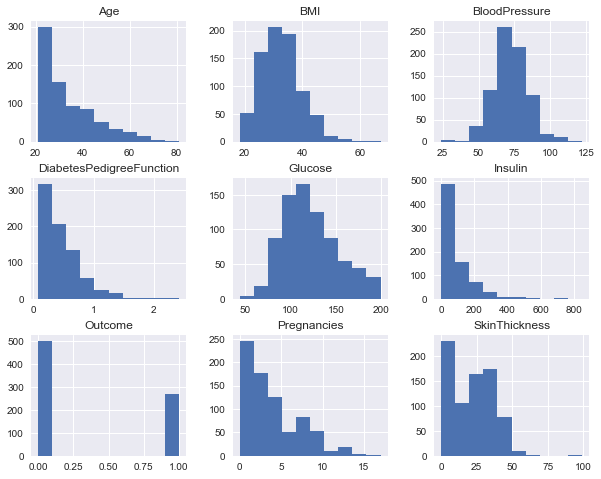

In [59]:
main_file.hist(figsize=(10,8))
plt.figure()
plt.show()

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

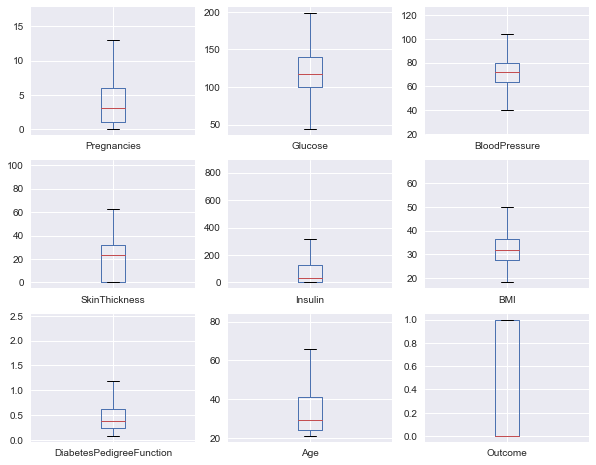

In [60]:
%matplotlib inline
main_file.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

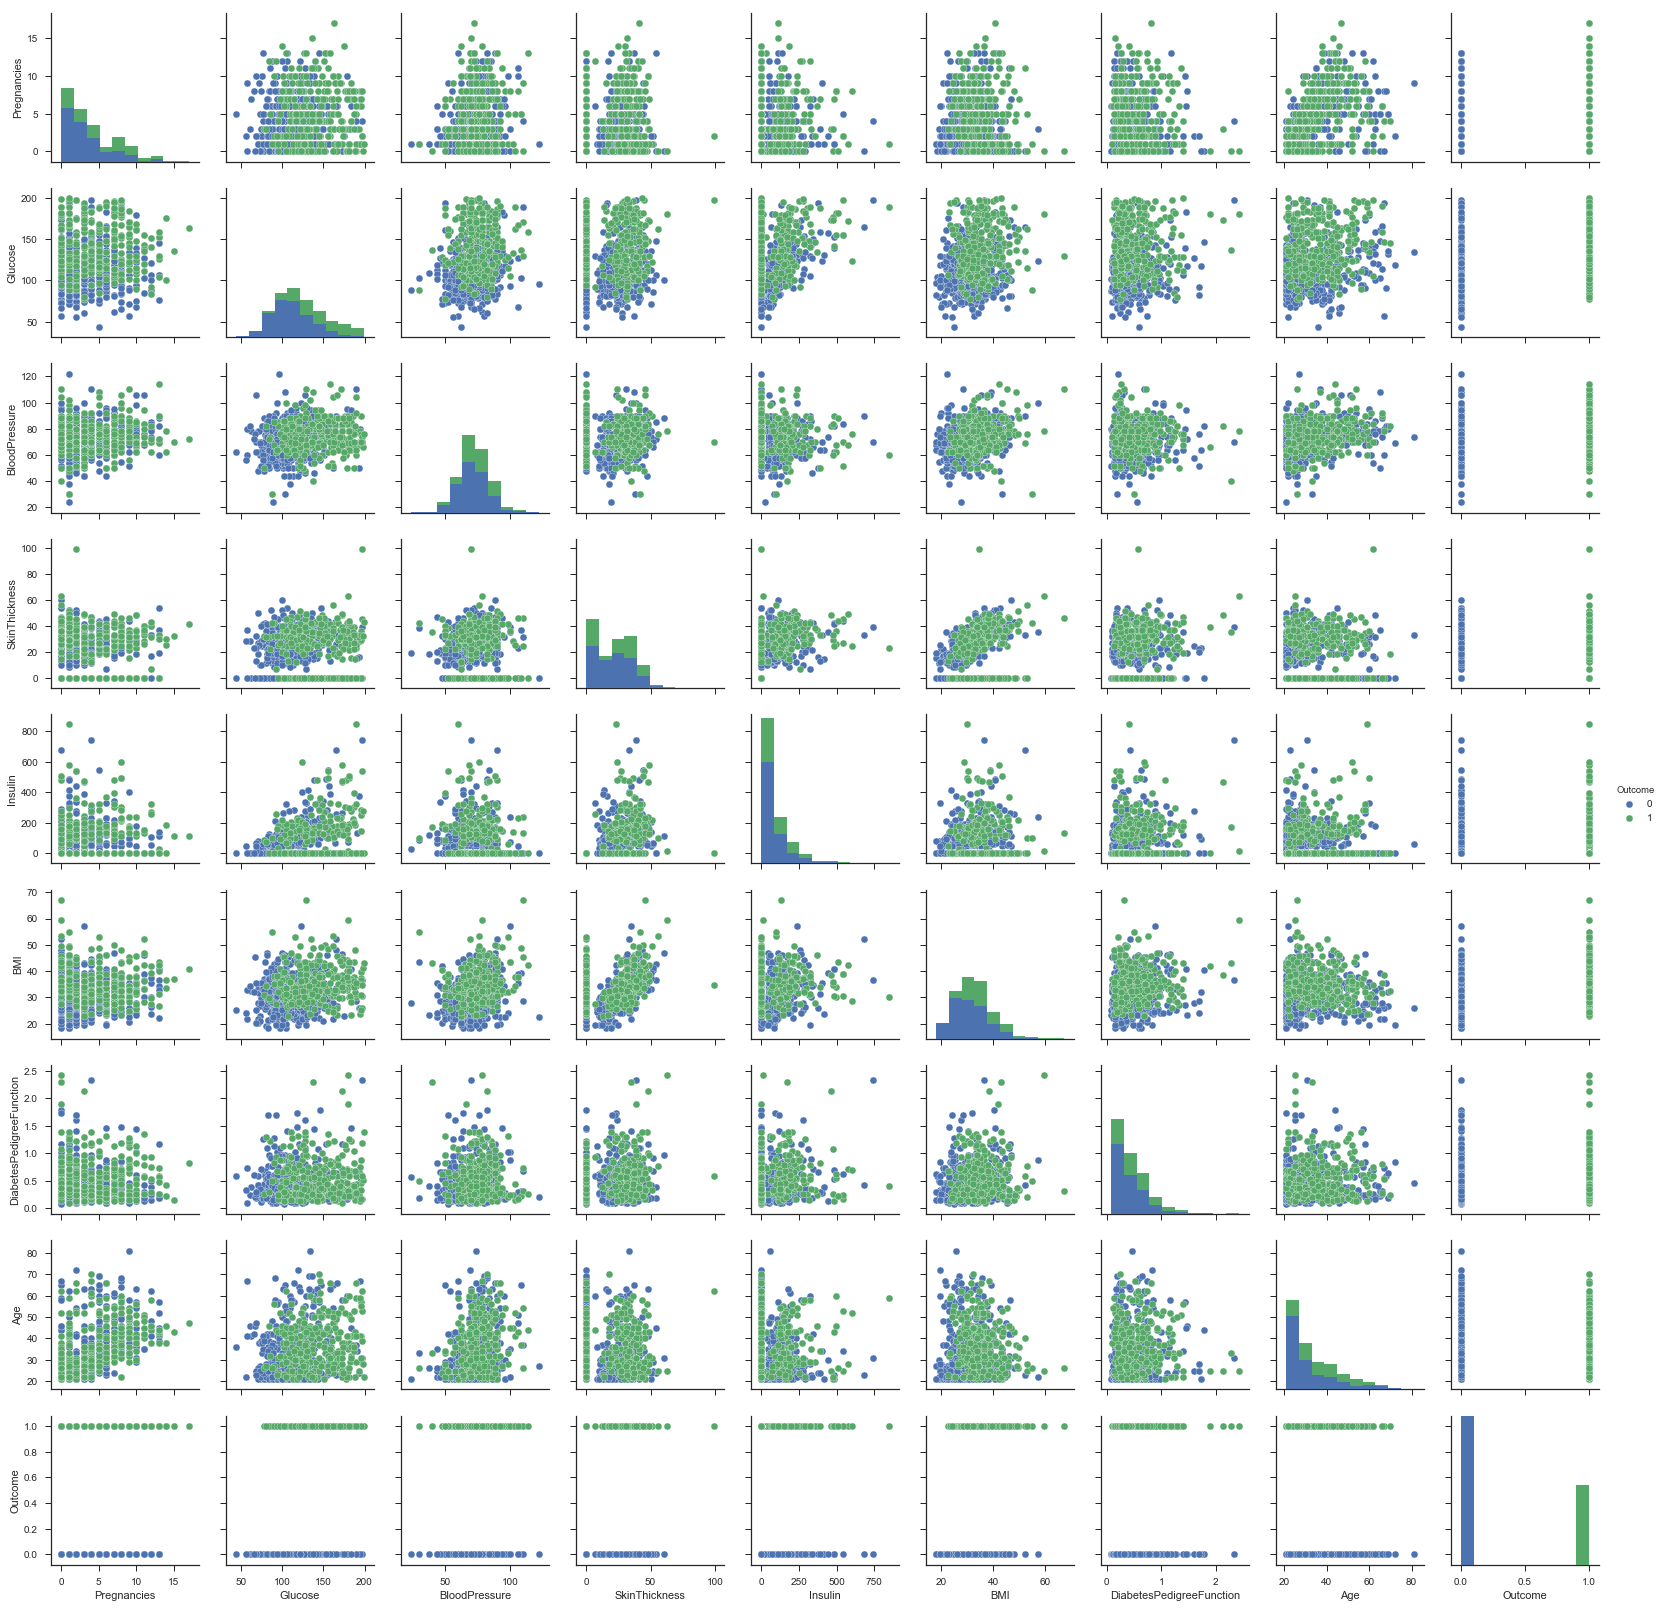

In [61]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(main_file, hue="Outcome")

###### Separating the data into Train & Test (80/20 split)

In [91]:
X = main_file.ix[:,0:8]
Y = main_file["Outcome"]
from sklearn import model_selection
X_train, X_test, Y_train, Y_test= model_selection.train_test_split(X, Y, test_size=0.2)

In [92]:
len(X_train)

614

In [93]:
len(X_test)

154

In [94]:
len(Y_train)

614

In [95]:
len(Y_test)

154

###### Importing different models to check for the best accuracy 

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [106]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    kfold = model_selection.KFold(n_splits=10)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.767239555791
LDA 0.770624008461
KNN 0.720121628768
CART 0.707059756742
RF 0.751031200423
NB 0.764013749339
SVM 0.65346377578


###### Visualizing the different model accuracies using a box plot

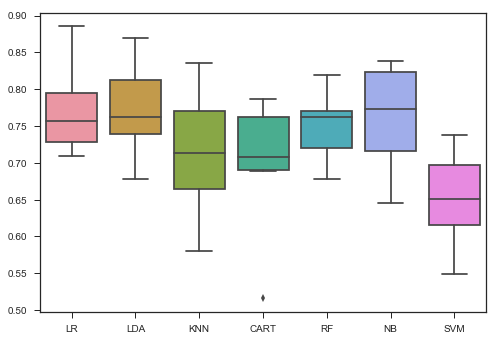

In [107]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

In [111]:
#FITTING THE LDA MODEL ON THE TEST DATASET
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions_lda = lda.predict(X_test)

In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [113]:
print("Accuracy Score is:")
print(accuracy_score(Y_test, predictions_lda))
print()

Accuracy Score is:
0.753246753247



In [104]:
print("Classification Report:")
print(classification_report(Y_test, predictions_lda))

Classification Report:
             precision    recall  f1-score   support

          0       0.78      0.86      0.82        99
          1       0.69      0.56      0.62        55

avg / total       0.75      0.75      0.75       154



###### Creating a Confusion Matrix

In [114]:
conf = confusion_matrix(Y_test,predictions_lda)

In [115]:
conf

array([[85, 14],
       [24, 31]])

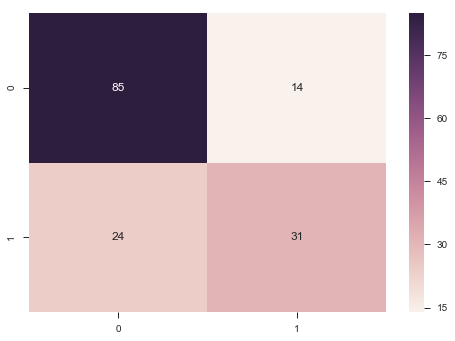

In [116]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)